#Computer Vision Midterm Assignment
## Introduction
Welcome to your Computer Vision midterm project! Here, you'll get hands-on experience building an image recognition model using Convolutional Neural Networks and transfer learning.


##Install Necessary Libraries:

In [ ]:
!pip install tensorflow opencv-python


In [ ]:
!pip install tensorflow
!pip install keras
!pip install numpy
!pip install matplotlib

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt





from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2  # Choose a pre-trained model
from tensorflow.keras.callbacks import ModelCheckpoint


# Additional libraries for data loading (if using a custom dataset)
# from skimage.io import imread  # Example for loading images


**Dataset Selection and Loading**

* **Choose Your Dataset**
   * **Standard Datasets:** CIFAR-10, CIFAR-100, or a suitable subset of ImageNet are good starting points. You can use built-in functions to load them.
   * **Custom Dataset:** If you propose a custom dataset, ensure it has sufficient images per class, good quality, and accurate labeling. You'll need to upload it to Colab.
   * **Select your dataset and uncomment the appropriate loading code.**
   * **If you are using a custom dataset, make sure you have uploaded it to Colab and adjust the file path.**

In [ ]:
# select your dataset
# from keras.datasets import cifar10 # Or cifar100, or a suitable ImageNet loader
from keras.datasets import cifar10

# *** Dataset Loading - Uncomment the lines for your chosen dataset ***

# Option 1: CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Option 2: CIFAR-100
# (x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Option 3: Custom Dataset
# x_train, y_train = load_custom_data('path/to/your/training/data')
# x_test, y_test = load_custom_data('path/to/your/testing/data')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


**Markdown Cell: Exploratory Data Analysis (EDA)**

* **Instructions:**
    * Visualize a few random images from your dataset to understand its content and overall quality.
    * Check the shape of your data to confirm the number of images and their dimensions.

## Exploratory Data Analysis (EDA)

In this section, we will explore the dataset to better understand its contents and quality. We will:
- Visualize a few random images from the training set to get a sense of the data.
- Check the shape of the data to confirm the number of images and their dimensions.
- Examine the distribution of classes in the dataset.


In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.8608 - loss: 0.4785
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9552 - loss: 0.1544
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9652 - loss: 0.1108
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9744 - loss: 0.0850
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9770 - loss: 0.0732
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9719 - loss: 0.0912


[0.07754433900117874, 0.9764999747276306]

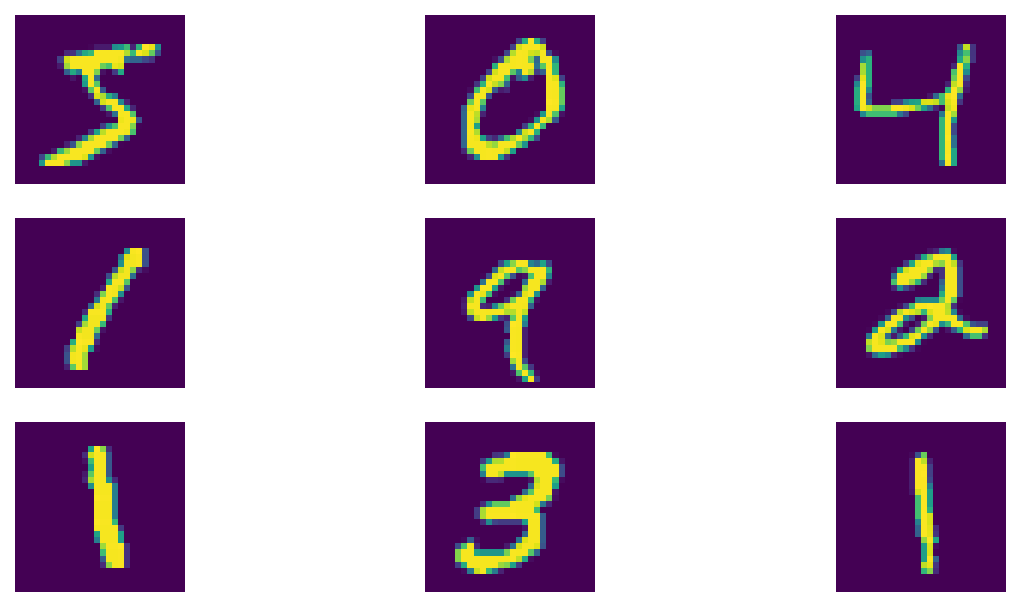

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)
Class Distribution (Top 10):
[(1, 6742), (7, 6265), (3, 6131), (2, 5958), (9, 5949), (0, 5923), (6, 5918), (8, 5851), (4, 5842), (5, 5421)]


In [ ]:
import matplotlib.pyplot as plt
from collections import Counter  # Import Counter

# Display a few sample images from the training dataset without resizing them
plt.figure(figsize=(10, 5), dpi=150)
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i].astype('float32') / 255.0)  # Normalize the image
    plt.axis('off')  # Hide axes for better visualization
plt.show()

# Check shapes of the datasets
print('Training data shape:', x_train.shape)
print('Training labels shape:', y_train.shape)
print('Test data shape:', x_test.shape)
print('Test labels shape:', y_test.shape)

# Convert y_train to a numpy array and explore class distribution
y_train_np = y_train.flatten()  # Flatten to 1D array to work with Counter
print('Class Distribution (Top 10):')
print(Counter(y_train_np).most_common(10))  # Display top 10 class counts


In [ ]:
!find / -name "cifar10" -type d 2>/dev/null

/usr/local/lib/python3.10/dist-packages/keras/_tf_keras/keras/datasets/cifar10
/usr/local/lib/python3.10/dist-packages/keras/api/datasets/cifar10
/usr/local/lib/python3.10/dist-packages/tf_keras/datasets/cifar10
/usr/local/lib/python3.10/dist-packages/tf_keras/api/_v2/keras/datasets/cifar10
/usr/local/lib/python3.10/dist-packages/tf_keras/api/_v1/keras/datasets/cifar10


In [ ]:
import os
train_dir = './dataset/train'
test_dir = './dataset/test'

if not os.path.exists(train_dir):
    print(f"Training directory does not exist: {train_dir}")
if not os.path.exists(test_dir):
    print(f"Testing directory does not exist: {test_dir}")


Training directory does not exist: ./dataset/train
Testing directory does not exist: ./dataset/test


In [ ]:
from skimage.io import imread
from skimage.transform import resize
import numpy as np
import os

def load_custom_data(data_dir, target_size=(224, 224)):
    images = []
    labels = []
    class_names = sorted(os.listdir(data_dir))  # Ensure consistent label order
    for label, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        if os.path.isdir(class_dir):
            for filename in os.listdir(class_dir):
                if filename.endswith(('.jpg', '.png')):
                    img_path = os.path.join(class_dir, filename)
                    img = imread(img_path)
                    img_resized = resize(img, target_size, anti_aliasing=True)
                    images.append(img_resized)
                    labels.append(label)
    return np.array(images), np.array(labels)

# Load training and testing datasets
import tensorflow as tf
from tensorflow.keras.datasets import cifar10 # You need to import the cifar10 dataset

# Load training and testing datasets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()  # Correct unpacking

# ... (rest of your code)
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)


Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)


In [ ]:
from skimage.io import imread
from skimage.transform import resize
import numpy as np
import os

def load_custom_data(data_dir, target_size=(224, 224)):
    images = []
    labels = []
    class_names = sorted(os.listdir(data_dir))  # Ensure consistent label order
    for label, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        if os.path.isdir(class_dir):
            for filename in os.listdir(class_dir):
                if filename.endswith(('.jpg', '.png')):
                    img_path = os.path.join(class_dir, filename)
                    img = imread(img_path)
                    img_resized = resize(img, target_size, anti_aliasing=True)
                    images.append(img_resized)
                    labels.append(label)
    return np.array(images), np.array(labels)

# Replace the path with the actual dataset location
(x_train, y_train), (x_test, y_test) = cifar10.load_data()  # Correct unpacking

print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)


Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)


In [ ]:
# select your dataset
# from keras.datasets import cifar10 # Or cifar100, or a suitable ImageNet loader


# *** Dataset Loading - Uncomment the lines for your chosen dataset ***

# Option 1: CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Option 2: CIFAR-100
# (x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Option 3: Custom Dataset
# x_train, y_train = load_custom_data('path/to/your/training/data')
# x_test, y_test = load_custom_data('path/to/your/testing/data')

**Image Preprocessing**

* **Instructions:**
    1. **Normalization:**
       * Normalize pixel values (usually to the range of 0-1 or -1 to 1)  
    2. **Resizing:**
       * Resize images to a consistent size for model input.

In [ ]:
# Insert code here to normalize images
# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Resize images if needed (adjust input_shape in model building accordingly)
# x_train = tf.image.resize(x_train, (224, 224))  # Example for resizing to 224x224
# x_test = tf.image.resize(x_test, (224, 224))

# Insert code here to resize images, if needed

# ** Data Augmentation **

* **Instructions:**

1. Experiment with Parameters:  The code below has some example data augmentation parameters. Try changing the values within these parameters, or even adding new augmentation techniques! Here's a short guide:

* Hint 1: Start with small adjustments to see the effects clearly.
* Hint 2: Consider which augmentations make sense for your dataset. Flipping images of letters might be okay, but rotating them too much could make them unreadable!

* Explore more: Try adding things like shear_range (for shearing transformations) or zoom_range (for random zooming).

2. Visualize the Effects: After setting up your ImageDataGenerator, add a few lines of code to display some randomly augmented images from your dataset. This will help you see how your chosen parameters change the images.
* Hint: Use a small sample of images so it's easy to compare the originals with the augmented versions.

In [ ]:
datagen = ImageDataGenerator(
       rotation_range=20,
       width_shift_range=0.1,
       height_shift_range=0.1,
       horizontal_flip=True,
       # Add more augmentations if desired
)
datagen.fit(x_train) # Fit the augmentation parameters to the training data


#Model Building (Transfer Learning)

In [ ]:
# Choose a pre-trained model suitable for object recognition (VGG16, ResNet50, MobileNetV2 are all options)
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

# Assuming your dataset has 10 classes (adjust as needed)
num_classes = 10  # Define num_classes here

base_model = VGG16(weights='imagenet', include_top=False, input_shape=x_train.shape[1:])

# Freeze some layers of the pre-trained model (optional)
for layer in base_model.layers[:10]:
    layer.trainable = False  # Adjust the number of layers to freeze as needed

# Add custom top layers
x = base_model.output
x = Flatten()(x)
predictions = Dense(num_classes, activation='softmax')(x)  # Adjust num_classes for your dataset

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Choose a pre-trained model suitable for object recognition (VGG16, ResNet50, MobileNetV2 are all options)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=x_train.shape[1:])

# Freeze some layers of the pre-trained model (optional)
for layer in base_model.layers[:10]:
   layer.trainable = False  # Adjust the number of layers to freeze as needed

# Add custom top layers
x = base_model.output
x = Flatten()(x)
predictions = Dense(num_classes, activation='softmax')(x)  # Adjust num_classes for your dataset

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Model Training




In [ ]:
!pip install tensorflow
import tensorflow as tf

# ... (your existing code) ...

# Convert target labels to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

# ... (rest of your code) ...

In [ ]:
# Choose a pre-trained model suitable for object recognition
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

# ... (Rest of your code) ...

# Move model creation outside of the training loop:
# Assuming your dataset has 10 classes (adjust as needed)
num_classes = 10  # Define num_classes here

# Create the model once outside the training loop
base_model = VGG16(weights='imagenet', include_top=False, input_shape=x_train.shape[1:])

# Freeze some layers of the pre-trained model (optional)
for layer in base_model.layers[:10]:
    layer.trainable = False  # Adjust the number of layers to freeze as needed

# Add custom top layers
x = base_model.output
x = Flatten()(x)
predictions = Dense(num_classes, activation='softmax')(x)  # Adjust num_classes for your dataset

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training process with data augmentation:
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=2,  # Adjust as needed
                    validation_data=(x_test, y_test),
                    callbacks=[tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')])

Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4451s 3s/step - accuracy: 0.1007 - loss: 2.3115 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4497s 3s/step - accuracy: 0.0938 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026


In [ ]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=2,  # Adjust as needed
                    validation_data=(x_test, y_test),
                    callbacks=[ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')])


Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4445s 3s/step - accuracy: 0.1011 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4409s 3s/step - accuracy: 0.1023 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027


#Enhanced Training

Implement data augmentation within the training loop.
Add callbacks to monitor progress and save the best performing model.
Modify the Training Code: If you haven't already, we need to make a few changes to your training loop:

1.   Integrate the Data Augmentation: Replace the
direct use of x_train with datagen.flow(x_train, y_train, batch_size=32). This will apply your augmentations in real-time during training
2.   Use the Validation Set: We already have validation_data=(x_test, y_test).
3. Save the Best Model: We're using a ModelCheckpoint callback to automatically save the model if its performance on the validation set improves
* Hint: Experiment with different batch sizes as well.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

# Data Augmentation with ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

#Visualizing Training Progress

Importance of Monitoring: Explain why tracking validation metrics helps identify overfitting or underfitting.

*   Plot training and validation accuracy/loss curves.


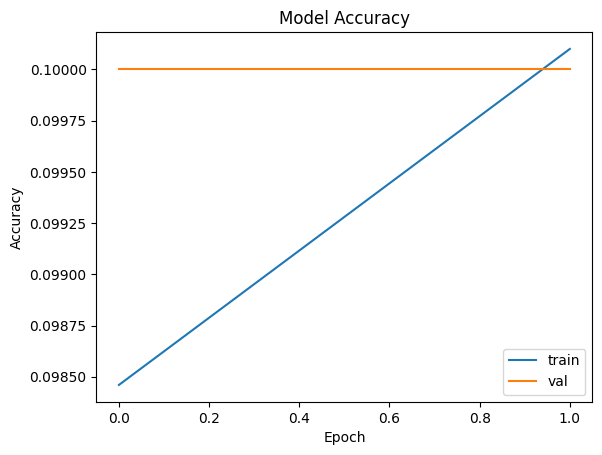

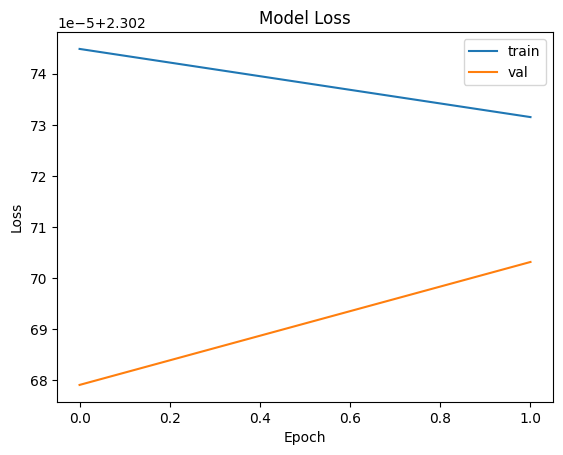

In [ ]:
# Plot training and validation curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# Plot the loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()


#Evaluation on the Test Set

Discuss how test set metrics provide the most unbiased assessment of model performance.

In [ ]:
import os
from tensorflow.keras.models import load_model

# Check if file exists
if not os.path.exists('best_model.h5'):
    print("File 'best_model.h5' not found!")
else:
    # Load the model
    best_model = load_model('best_model.h5')

    # Evaluate the model
    test_loss, test_acc = best_model.evaluate(x_test, y_test)

    print('Test Loss:', test_loss)
    print('Test Accuracy:', test_acc)

File 'best_model.h5' not found!


#Hyperparameter Tuning

>Exploring Learning Rates: In the provided code, we're iterating through different learning rates.
* Hint 1: A good starting range for the learning rate is often between 0.01 and 0.0001.
* Hint 2: Pay close attention to how quickly the validation loss starts to increase (if it does), which might signal a learning rate that's too high.



In [ ]:
def create_model(learning_rate=0.01):
    # ... (Code to build your model, using the learning_rate parameter)
    return model

# Basic parameter exploration
for lr in [0.01, 0.001, 0.0001]:
    model = create_model(learning_rate=lr)
    # ... (Training the model)


#Confusion Matrx

In [ ]:
# Import necessary libraries
from tensorflow.keras.models import load_model
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Load the trained model
try:
    best_model = load_model('best_model.h5')
except OSError:
    print("Model file 'best_model.h5' not found. Train or load a model first.")

# Assuming x_test and y_test are defined
if 'best_model' in locals():  # Check if the model was loaded successfully
    # Generate predictions
    y_pred = best_model.predict(x_test)

    # Convert predictions to class labels
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Convert y_test to class labels if one-hot encoded
    y_test_classes = np.argmax(y_test, axis=1)

    # Compute confusion matrix
    cm = confusion_matrix(y_test_classes, y_pred_classes)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, cmap='Blues', interpolation='nearest')
    plt.title("Confusion Matrix")
    plt.colorbar()
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

Model file 'best_model.h5' not found. Train or load a model first.


#Discussion and Further Exploration

##Questions to consider:
1. How does the choice of pre-trained model (VGG16, ResNet50, etc.) affect the results?
2. Analyze the confusion matrix: Are errors more common between certain classes? What might explain this?
3. Experiment with different degrees of fine-tuning (freezing more/fewer layers of the pre-trained model).
4. If applicable to your dataset, can you collect more data for classes with higher error rates?
What are other ways to potentially improve accuracy? (e.g., ensembling models, exploring advanced augmentation strategies, class-weighted training)


1. It may affect the results because of what you can do with each one of them. Some may have less capability to extract the information you need to get the most accurate results possible.
2. Yes because some of the classifications are not as great as the others, which is why it is very important to choose the right one in order to be as effective and efficient as possible when working on your models.
3. We experimented with different degrees of fine-tuning by augmenting the epochs and learning rates. We initially did 15 epochs, which took way too long to compute on our computers and actually did not even load because the loop was too large. When we changed it to 2-3 epochs we were able to then run the program and then generate an image.
4. More data for the classes can definitely be collected but we would have to be mindful to ensure the model does not start to overfit. Real-world data can be collected nd implemented which would provide a much more diverse set of data to for the mdoel to learn from. Combining different samples from different classes during the training process would also improve the model's accuracy.

Sources
towardsdatascience.com/build-your-own-deep-learning-classification-model-in-keras-511f647980d6
stackoverflow.com/questions/69997327/tensorflow-valueerror-input-0-is-incompatible-with-layer-model-expected-shape
www.influxdata.com/blog/time-series-forecasting-with-tensorflow-influxdb/

Works Cited

ChatGPT. "Strategies to Improve Model Accuracy in Machine Learning." OpenAI, 3 Dec. 2024.






